# Data interpreter
Data aggregator contains all the extracted words from videos. To create usable data, interpret it here.

In [1]:
from os.path import join
import json
from transcriber import Transcriber
import ipywidgets as widgets


In [2]:
class DataInterpreter:
    def __init__(self):

        self.output_widget = None
        self.setup_output_widget()
        
        self.aggregated_data_folder = "sequence classification style og"
        self.extracted_data_folder = "usable data style og"
        
    def setup_output_widget(self):
        self.output_widget = widgets.Output()

    # Returns and ipywidget output widget that is used for live output in jupyter notebook
    def output(self):
        return self.output_widget
    
    def get_label_frequency(self, top_n=None):
        
        # Open datafile
        # Path of the file holding all the usable words collected
        filename = join(self.aggregated_data_folder, "data_sorted_slowest.json")

        # Load the file and read it as json
        with open(filename, 'r') as file:
            words = json.load(file)
            
        label_frequency = dict()
        for word in words:
            label = word["label"]
            if label not in label_frequency:
                label_frequency[label] = 0
            
            label_frequency[label] += 1
        
        sorted_labels = sorted([(hits, word) for word, hits in label_frequency.items()], reverse=True)
        
        if top_n:
            return sorted_labels[:top_n]
        return sorted_labels
            
    def lip_trace(self):
        pass
    
    def feature_extraction(self, best_transcript="slowest"):
        
        # Open datafile
        
        # Path of the file holding all the usable words collected
        filename = join(self.aggregated_data_folder, "data_sorted_slowest.json")

        # Load the file and read it as json
        with open(filename, 'r') as file:
            words = json.load(file)
            
        labels = list()
        instances = 0
        
        for word in words:
            label = word["label"]
            if label not in labels:
                labels.append(label)
            
            instances += 1
                
        print("Loaded {} labels, {} instances".format(len(labels), instances))
    
    def cropped_mouth_old(self, desired_labels=None, best_transcript="slowest"):
        
        # Open datafile
        
        # Path of the file holding all the usable words collected
        filename = join(self.aggregated_data_folder, "data_sorted_slowest.json")

        # Load the file and read it as json
        with open(filename, 'r') as file:
            words = json.load(file)
            
        labels = list()
        instances = 0
        
        for word in words:
            label = word["label"]
            if label not in labels:
                labels.append(label)
            
            instances += 1
                
        print("Loaded {} labels, {} instances".format(len(labels), instances))
        
        interpreted_data = list()
        
        total_words = len(words)
        for index, word in enumerate(words):
            label = word["label"]
            
            # If this label is not desired, skip it
            if label not in desired_labels:
                continue

            interpretation = dict()
            
            video = word["video"]
            rects = word["rects"]
            length = len(rects)
            
            t = Transcriber(video, quick=True)
            
            interpretation["label"] = label
            
            interpretation["mouth"] = list()
            
            frames = [rect["frame"] for rect in rects]
            interpretation["mouth"] = t.get_mouth_of_frames(frames)
            
            with self.output_widget:
                self.output_widget.clear_output(wait=True)
                print("Word {}/{} {}%".format(index, total_words, round(100/total_words*index, 2)))
                print("Label: {}".format(label))
                print("Video: {}".format(video))
                print("Frame: {}".format(frame))
                print("Progress: {}/{} frames".format(rect_index, length))
            
            for rect_index, rect in enumerate(rects):
                frame = rect["frame"]
                x, y, w, h = rect["rect"]

                mouth = t.get_mouth_of_frame(frame)
                
                interpretation["mouth"].append(mouth)
            
            interpreted_data.append(interpretation)
    
    def cropped_mouth(self, desired_labels=None, best_transcript="slowest"):
        
        # Open datafile
        
        # Path of the file holding all the usable words collected
        filename = join(self.aggregated_data_folder, "data_sorted_slowest.json")

        # Load the file and read it as json
        with open(filename, 'r') as file:
            words = json.load(file)
            
        labels = list()
        instances = 0
        
        for word in words:
            label = word["label"]
            if label not in labels:
                labels.append(label)
            
            instances += 1
                
        print("Loaded {} labels, {} instances".format(len(labels), instances))
        
        interpreted_data = list()
        
        total_words = len(words)
        for index, word in enumerate(words):
            label = word["label"]
            
            # If this label is not desired, skip it
            if label not in desired_labels:
                continue

            interpretation = dict()
            
            video = word["video"]
            rects = word["rects"]
            length = len(rects)
            
            t = Transcriber(video, quick=True)
            
            interpretation["label"] = label
            
            frames = [rect["frame"] for rect in rects]
            mouths = t.get_mouth_of_frames(frames)
            
            interpretation["shape"] = mouths[0].shape

            interpretation["mouth"] = list()
            for mouth in mouths:
                interpretation["mouth"].append(mouth.flatten().tolist())
            
            with self.output_widget:
                self.output_widget.clear_output(wait=True)
                print("Word {}/{} {}%".format(index, total_words, round(100/total_words*index, 2)))
                print("Label: {}".format(label))
                print("Video: {}".format(video))
            
            interpreted_data.append(interpretation)
            
        output_filename = join(self.extracted_data_folder, "cropped mouth.json")

        # Dump the dictionary to a json file
        with open(output_filename, "w") as json_file:
            json.dump(interpreted_data, json_file, indent=2)

        return output_filename
        

In [3]:
di = DataInterpreter()

In [4]:
desired_labels = di.get_label_frequency(5)
desired_labels = [pair[1] for pair in desired_labels]

In [5]:
di.output()

Output()

In [6]:
di.cropped_mouth(desired_labels)

Loaded 3102 labels, 28992 instances


'usable data style og\\cropped mouth.json'

In [7]:
t = Transcriber("10 easy mens style upgrades", quick=True)

In [8]:
mouth_file = join(di.extracted_data_folder, "cropped mouth.json")

with open(mouth_file, 'r') as file:
    mouth = json.load(file)

Shape: [25, 30]
Frames: 5


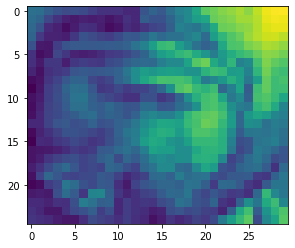

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = mouth[0]

print("Shape:", data["shape"])
print("Frames:", len(data["mouth"]))

image = np.matrix(data["mouth"][0])

image = np.reshape(image, (25, 30))

plt.imshow(image)

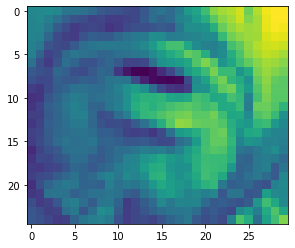

In [10]:
for iii in range(5):
    image = np.matrix(data["mouth"][iii])

    image = np.reshape(image, (25, 30))

    plt.imshow(image)

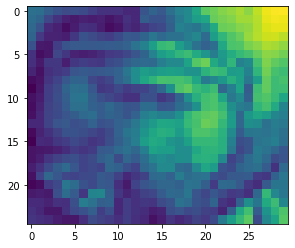

In [11]:
image = np.matrix(data["mouth"][0])

image = np.reshape(image, (25, 30))

plt.imshow(image)

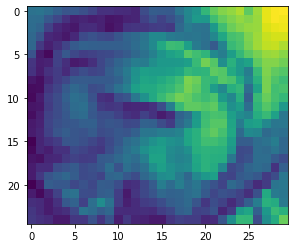

In [12]:
image = np.matrix(data["mouth"][1])

image = np.reshape(image, (25, 30))

plt.imshow(image)

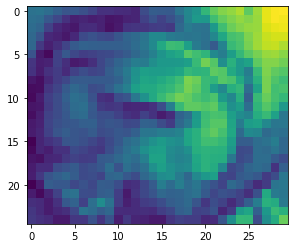

In [13]:
image = np.matrix(data["mouth"][2])

image = np.reshape(image, (25, 30))

plt.imshow(image)

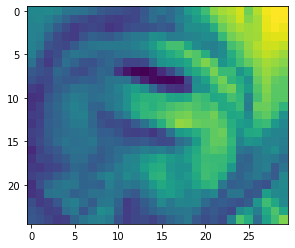

In [14]:
image = np.matrix(data["mouth"][3])

image = np.reshape(image, (25, 30))

plt.imshow(image)

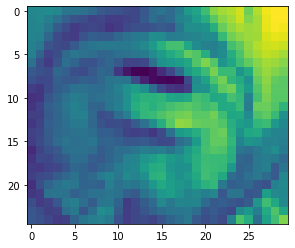

In [15]:
image = np.matrix(data["mouth"][4])

image = np.reshape(image, (25, 30))

plt.imshow(image)

In [16]:
image = np.matrix(data["mouth"][5])

image = np.reshape(image, (25, 30))

plt.imshow(image)

IndexError: list index out of range